#### Татур А.А.

#### ver 0.1

#### 12.10.2022

## Задача:

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого:

1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность
7. Пробуем написать вывод по полученным результатам. 

###### Импорт библиотек

In [119]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import normaltest
from scipy.stats import pearsonr 

##### Импортируем данные (сразу удалил колонку даты сделки)

In [122]:
#https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
datas=pd.read_excel('Real estate valuation data set.xlsx', index_col=0).drop('X1 transaction date', axis=1)

#### Нормализуем все данные и скалируем. 

##### MinMaxScaler в диапазоне -1:1

In [123]:
tmp=preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(datas)
mm_data=pd.DataFrame(tmp,columns=datas.columns)
mm_data.head(20)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
5,-0.675799,-0.334333,-0.4,-0.249152,-0.158723,-0.554140
6,0.575342,-0.814347,0.4,0.145419,0.356265,-0.404914
7,-0.073059,-0.918257,0.2,0.171837,0.482640,-0.288444
8,0.447489,0.698055,-0.8,-0.542414,-0.761699,-0.796178
9,-0.182648,-0.455562,-0.4,-0.145904,-0.108691,-0.736124


##### Z-преобразование (StandardScaler)

In [124]:
temp = preprocessing.StandardScaler().fit_transform(datas)
tr_pd=pd.DataFrame(temp, columns=datas.columns)
tr_pd.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


### Поиск пропусков

In [125]:
datas.describe(include = "all")
datas.info()
# Если бы они были, можно было бы просто выбросить эти строки data_wona=data.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.6 KB


#### Обрабатываем выбросы

1. Строим бокс-плот для каждой колонки, оцениваем наличие выбросов. По графикам видно, что колонки "X3 distance to the nearest MRT station", "X5 latitude", "X6 longitude", "Y house price of unit area" Содержат выбросы.

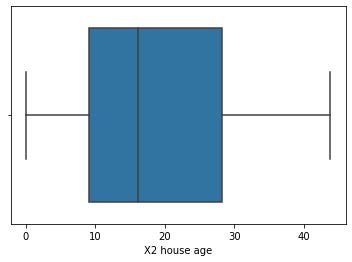

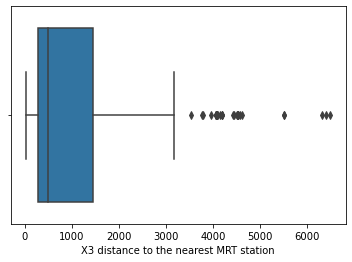

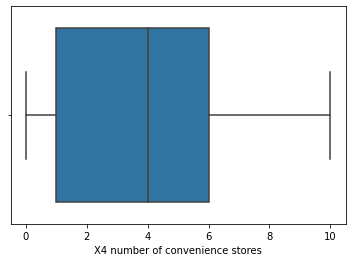

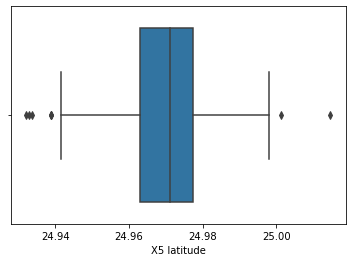

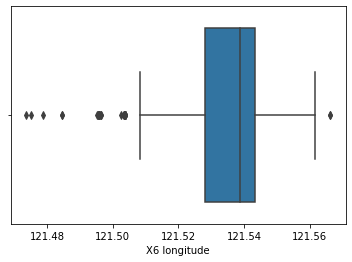

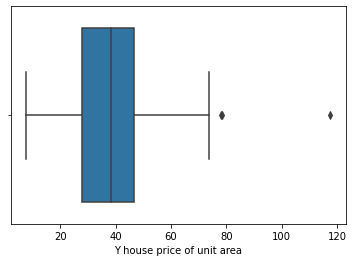

In [126]:
for col in datas.columns:
    plt.figure()
    sns.boxplot(x=datas[col])

##### Удаляем выбросы. Определеяем доверительный интервал (1.5 квартиля от медианы) и включаем значение в новый датасет только значение между этими границами для каждого столбца. 

In [127]:
#функция для очистки данных

def lets_clean(data, cols): #data as pd.DataFrame, col_name as list
    for col_name in cols:
        Q1 = data[col_name].quantile(0.25)
        Q3 = data[col_name].quantile(0.75)
        IQR=Q3-Q1
        data=data[(data[col_name] > Q1-1.5*IQR ) & (data[col_name] < Q3+1.5*IQR)]
    return data

In [128]:
# проводим очистку
to_clean = ["X3 distance to the nearest MRT station",  "X5 latitude", "X6 longitude", "Y house price of unit area"]
cleaned_data = lets_clean(datas, to_clean)

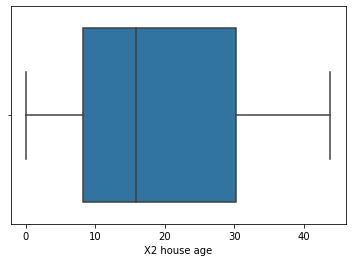

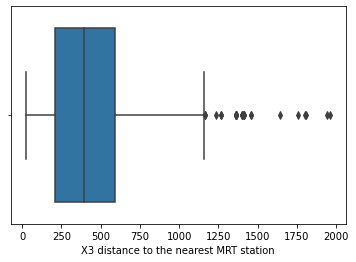

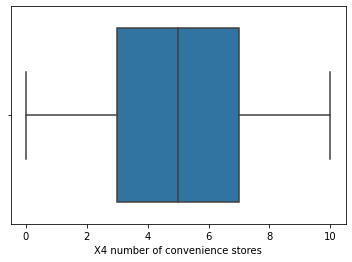

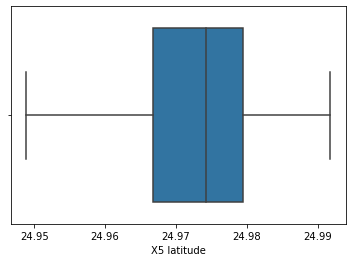

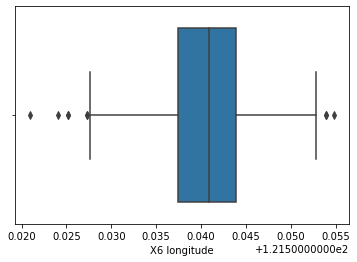

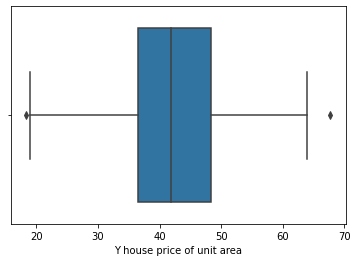

In [129]:
for col in cleaned_data.columns:
    plt.figure()
    sns.boxplot(x=cleaned_data[col])

#### Строим корелляционную матрицу

<AxesSubplot:>

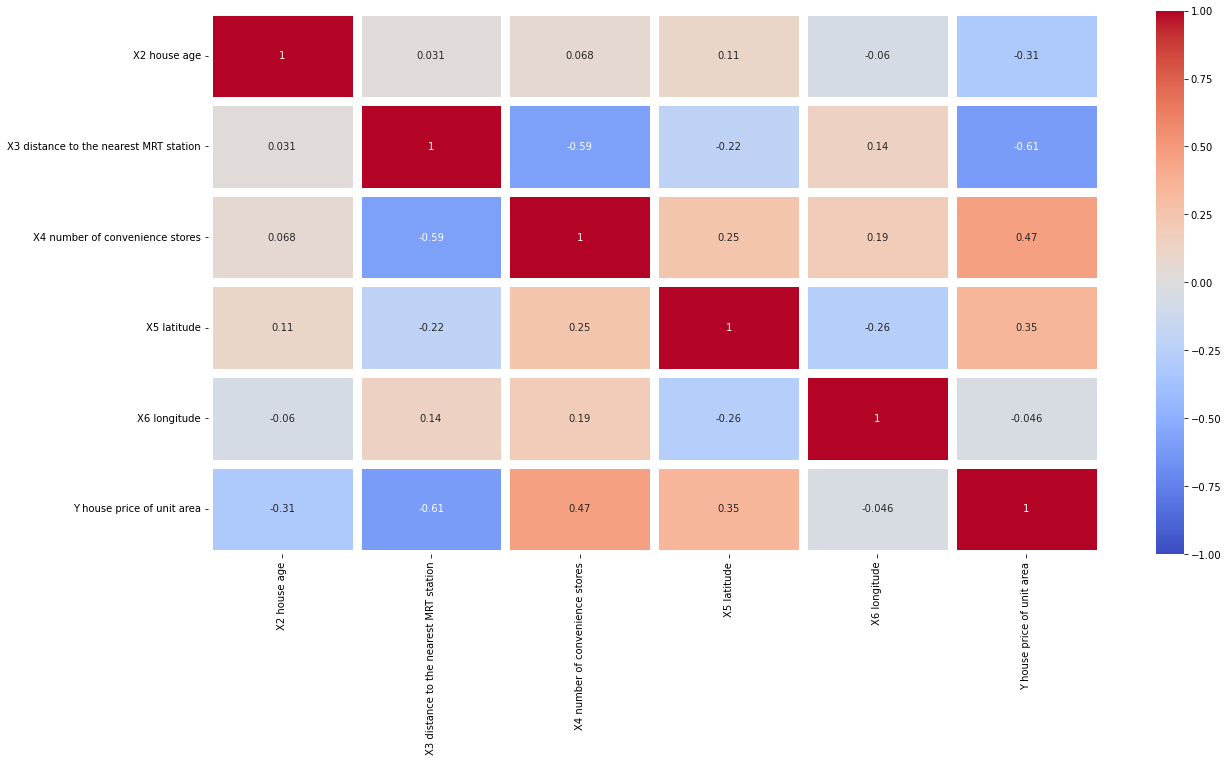

In [130]:
plt.figure(figsize=(20,10))
sns.heatmap(cleaned_data.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=9, linecolor='white', cbar_kws= {'orientation': 'vertical'})

##### Строим гистрограммы распределения

<Figure size 3600x4320 with 0 Axes>

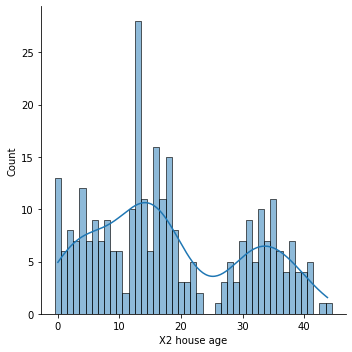

<Figure size 3600x4320 with 0 Axes>

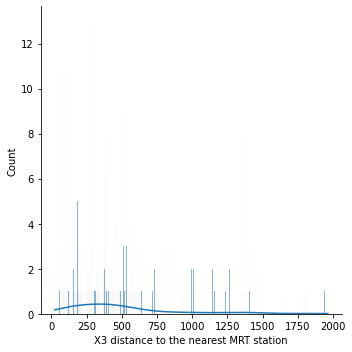

<Figure size 3600x4320 with 0 Axes>

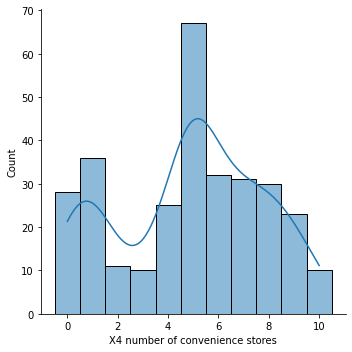

<Figure size 3600x4320 with 0 Axes>

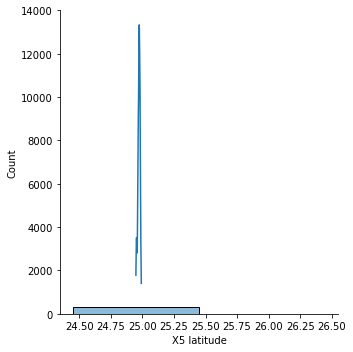

<Figure size 3600x4320 with 0 Axes>

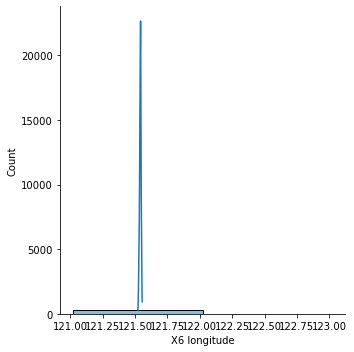

<Figure size 3600x4320 with 0 Axes>

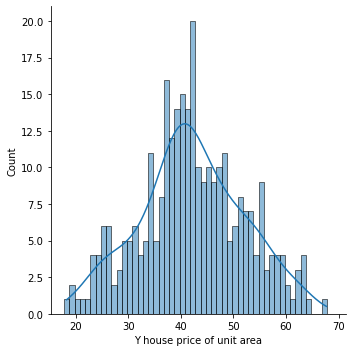

In [131]:
for col in cleaned_data.columns:
    plt.figure(figsize=(50,60))
    sns.displot(x=cleaned_data[col], discrete = True, kde = True)

##### Тест на нормальность

In [132]:
for col in cleaned_data.columns:
    print (col,end=':')
    if normaltest(cleaned_data[col]).pvalue>0.05:
        print ("Распределение СООТВЕТСТВУЕТ нормальному")
    else:
        print ("Распределение НЕ СООТВЕТСТВУЕТ нормальному")

X2 house age:Распределение НЕ СООТВЕТСТВУЕТ нормальному
X3 distance to the nearest MRT station:Распределение НЕ СООТВЕТСТВУЕТ нормальному
X4 number of convenience stores:Распределение НЕ СООТВЕТСТВУЕТ нормальному
X5 latitude:Распределение НЕ СООТВЕТСТВУЕТ нормальному
X6 longitude:Распределение НЕ СООТВЕТСТВУЕТ нормальному
Y house price of unit area:Распределение СООТВЕТСТВУЕТ нормальному


### Ищем (взоимозависимые данные).  В качестве параметра с которым искал корелляцию выбрал цену дома

In [133]:
features = ['X2 house age','X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
y=cleaned_data['Y house price of unit area']
for data in features:
    r,p = pearsonr(cleaned_data[data], y)
    print("Коэффициент корелляции между {} и {} составил - ".format(data, 'Y house price of unit area'), end = ' ')
    if p<0.05:
        print ('Данные различия статистически ЗНАЧИМЫ')
    else: 
        print ('Данные различия статистически НЕ ЗНАЧИМЫ')

Коэффициент корелляции между X2 house age и Y house price of unit area составил -  Данные различия статистически ЗНАЧИМЫ
Коэффициент корелляции между X3 distance to the nearest MRT station и Y house price of unit area составил -  Данные различия статистически ЗНАЧИМЫ
Коэффициент корелляции между X4 number of convenience stores и Y house price of unit area составил -  Данные различия статистически ЗНАЧИМЫ
Коэффициент корелляции между X5 latitude и Y house price of unit area составил -  Данные различия статистически ЗНАЧИМЫ
Коэффициент корелляции между X6 longitude и Y house price of unit area составил -  Данные различия статистически НЕ ЗНАЧИМЫ


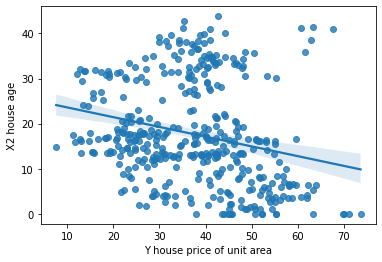

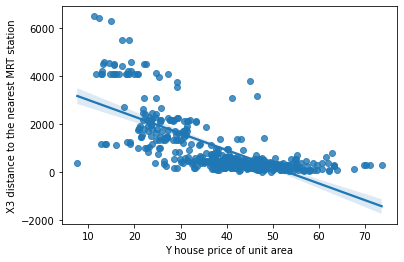

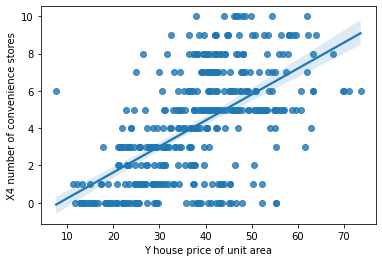

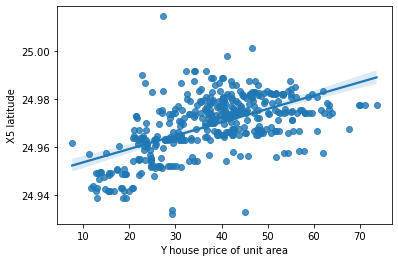

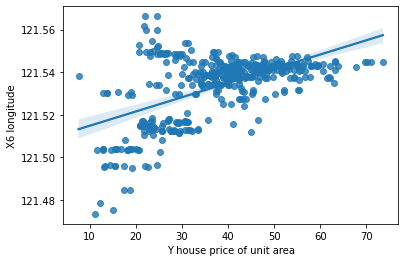

In [107]:
for col in features:
    plt.figure()
    sns.regplot(x=cleaned_data['Y house price of unit area'],y=cleaned_data[col])

##### Выводы по полученным результатам. 

1. Распределение всех изученных параметров, кроме "Y house price of unit area" не соответствует нормальному.
2. Параметр "Y house price of unit area" (цена дома) имеет статистически значимую корелляцию со всеми параметрами, кроме географической долготы "X6 longitude"
4. Корелляция между ценой дома и параметрами X2 house age, X3 distance to the nearest MRT station - имеют отрицательную корелляцию, что значит, что с увеличением возраста дома и удаленностит от MRT station цена на дом уменьшается. 
5. Корелляция между ценой дома и параметрами X4 number of convenience stores, X5 latitude и X6 longitude имеет положительное значение, что значит, что с увеличением числа магазинов и географической широты и долготы цена на дом возрастает 